## BoundaryDM Tutorial

Here is a brief tutorial on using this library for manifold learning. 

- First, clone this repo.
- Second, create a new virtual environment, and install the requirements.txt file from the command line using "pip install -r requirements.txt"
- Next, import BoundaryDM.py into your .py or .ipynb file.
- Now, you're ready to go. 

Let's demonstrate how we can use this on a semi-circle. First, we'll generate the dataset.

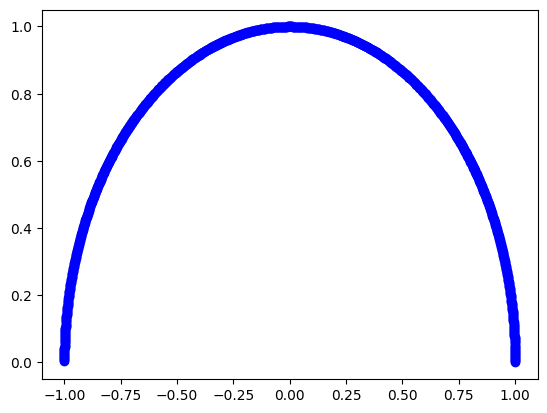

In [2]:
import matplotlib.pyplot as plt
import numpy as np
N = 1000
X = np.zeros((N,5))

for i in range(0,N):
    X[i,0] = np.cos(np.pi*(i/(N)))
    X[i,1] = np.sin(np.pi*(i/(N))) 
fig,ax = plt.subplots()
ax.scatter(X[:,0],X[:,1], color = "blue")

Now, we'll import the TGL model from BoundaryDM, and fit it to the data.

auto tuning begin. TGL only.
training finished. Total time:1.572765827178955

Selected epsilon = 1e-05


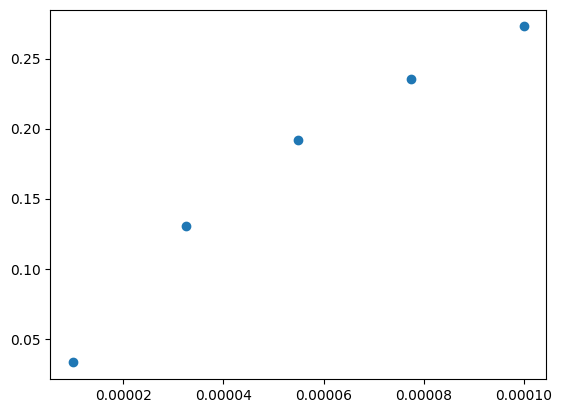

In [3]:
from BoundaryDM import TGL
tgl= TGL()
tgl.fit(X, verbose = True, epsilon_grid_params=[1e-5,1e-4,5])

A couple of notes:
- Using "verbose = True" allows us to analyze the training time, as well as a plot visualizing the training error as a function of epsilon. 
- "epsilon_grid_params" is a list which defines a grid for epislons to train over. In the above example, we tested 5 epsilons equally spaced between 1e-5 and 1e-4.

Since this is a semi-circle, we measure if the algorithm captured the structure of the manifold by checking the TGL.eigenvalues attribute. In Since this is a semi-circle, and the TGL estimates the "Dirichlet Laplacian," we expect the result to be $[1^2,2^2, ... , ]$. Let's check:

In [5]:
tgl.eigenvalues

array([  1.008,   4.031,   9.069,  16.122,  25.191,  36.275,  49.374,
        64.489,  81.618, 100.763])

We see that the error is fairly small, eventhough we only used 1,000 data points. 

The Manifold Learning algorithm presented here is a generalization of the DiffusionMaps algorithm. You can read more about it [here](https://arxiv.org/abs/2110.06988).